# Admin

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [4]:
def residual(theoretical, observed):
    return theoretical - observed

def normalised_residual(theoretical, observed, error):
    return  (theoretical - observed) / error

def chi_squared(model_params, model, x_data, y_data, y_error):
    return(np.sum(((y_data - model(x_data, *model_params))/y_error)**2))

def reduced_chi_squared(Chi_squared, DoF):
    return Chi_squared / (DoF - 1)

In [35]:
def DataLoader(file_name, file_type, independent_variable_name, dependent_variable_name, independent_variable_uncertainty_name, dependent_variable_uncertainty_name, model, p0_model):

    file_type = file_type.lower()

    if file_type == "xlsx":
        df = pd.read_excel(file_name)
    elif file_type == "csv":
        df = pd.read_csv(file_name)

    else:
        raise AssertionError("Unsupported file type")

    x_data = df[independent_variable_name].to_numpy()
    y_data = df[dependent_variable_name].to_numpy()

    x_error = df[independent_variable_uncertainty_name].to_numpy()
    y_error = df[dependent_variable_uncertainty_name].to_numpy()

    if len(x_data) <= len(p0_model):
        raise ValueError("Not enough data points for number of fit parameters")

    popt_model, cov_model = curve_fit(model,
                                  x_data,
                                  y_data,
                                  sigma = y_error,
                                  p0 = p0_model,
                                  absolute_sigma = True) #if the error is accurate set to True, if guess set False

    model_uncertainties = np.sqrt(np.diag(cov_model))
    chi2 = chi_squared(popt_model, model, x_data, y_data, y_error)
    Dof = len(x_data) - len(p0_model)
    Rchi2 = reduced_chi_squared(chi2, Dof)

    norm_res = normalised_residual(model(x_data, *popt_model), y_data, y_error)

    return(x_data, x_error,
           y_data, y_error,
           popt_model, model_uncertainties, norm_res,
           chi2, Rchi2)



def Plotter(x_data, y_data, y_error, popt_model, model_uncertainties, norm_res):
    fig = plt.figure(1)

    main = fig.add_axes([0,0,1,1])
    main.errorbar(x_data, y_data, yerr = y_error, fmt='none', linestyle='None', color = 'black', label = 'Data')
    main.plot(x_data, model(x_data, *popt_model), label = "Model", color = 'grey', alpha = 0.5)


    plt.ylabel(dependent_variable_name)
    main.legend()

    resplt = fig.add_axes([0,-0.2,1,0.2])
    resplt.axhline(0, color='black')
    resplt.axhline(1, color='grey', linestyle = '--')
    resplt.axhline(-1, color='grey', linestyle = '--')

    resplt.scatter(x_data, norm_res, marker = 'D', color = 'black', s = 3)

    plt.xlabel(independent_variable_name)
    plt.ylabel("Normalised \n Residuals")
    plt.show()

    print(f"----- Fit Results -----")
    for i in range(len(popt_model)):
        print(f"fit variable {i+1} = {popt_model[i]:.5f}±{model_uncertainties[i]:.5f}")

    print(f"----- Data Analysis -----")
    print(f"Chi^2 = {chi2:.5f}")
    print(f"Reduced Chi^2 = {Rchi2:.5f}")
    print(f"----- ----- ----- -----")


# Inputs necessary

In [32]:
def model(x, A,B):
    return A*x**B

p0_model = [1.1, 0.5]

In [33]:
file_name = "Trial_Datasheet.xlsx"
independent_variable_name = "variable_1"
dependent_variable_name = "variable_2"
independent_variable_uncertainty_name = "uncertainty_1"
dependent_variable_uncertainty_name = "uncertainty_2"
file_type = "xlsx"

df = pd.read_excel(file_name)

# Workflow

In [ ]:
#-------- NOTE TO ALL USERS --------


# DataLoader returns a 9-Tuple of variables that are the basics for assessing the fit of a model

# It expects the variables that are input to be the end goal variables, if you don't have them, they need to be obtained first

# Currently only compatible for importing data either from an excel spreadsheet that is already in the github repo or from a csv file also in the github repo

In [34]:
(x_data, x_error,
 y_data, y_error,
 popt_model, model_uncertainties, norm_res,
 chi2, Rchi2) = DataLoader(file_name, file_type,independent_variable_name, dependent_variable_name, independent_variable_uncertainty_name, dependent_variable_uncertainty_name, model, p0_model)

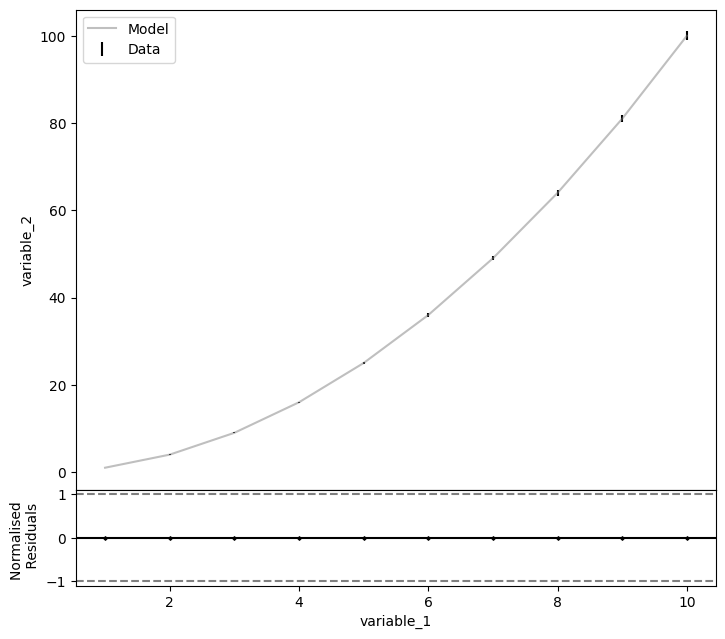

----- Fit Results -----
fit variable 1 = 1.00000±0.00756
fit variable 2 = 2.00000±0.00455
----- Data Analysis -----
Chi^2 = 0.00000
Reduced Chi^2 = 0.00000
----- ----- ----- -----


In [36]:
Plotter(x_data, y_data, y_error, popt_model, model_uncertainties, norm_res)